# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

# Lets import our package 

In [2]:
import rmfit
rmfit

/Users/gks/opt/anaconda3/envs/py39/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_types = {_np.int, _np.int8, _np.int16, _np.int32, _np.int64, _np.integer}


<module 'rmfit' from '/Users/gks/Dropbox/mypylib/notebooks/GIT/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
# Data from:
# Narita et al. 2009: https://ui.adsabs.harvard.edu/abs/2009PASJ...61..991N/abstract
df = pd.read_csv('../data/example/03_hd17156/narita2009_hd17156.txt',comment='#')
df

,bjd,rv,e_rv
0,2.454778e+06,71.48,3.15
1,2.454778e+06,69.36,3.26
2,2.454778e+06,69.19,3.15
3,2.454778e+06,67.40,3.06
4,2.454778e+06,63.25,3.34
...,...,...,...
73,2.454778e+06,-68.85,2.81
74,2.454778e+06,-69.28,3.00
75,2.454778e+06,-74.63,3.42
76,2.454778e+06,-72.57,2.90


Text(0, 0.5, 'RV [m/s]')

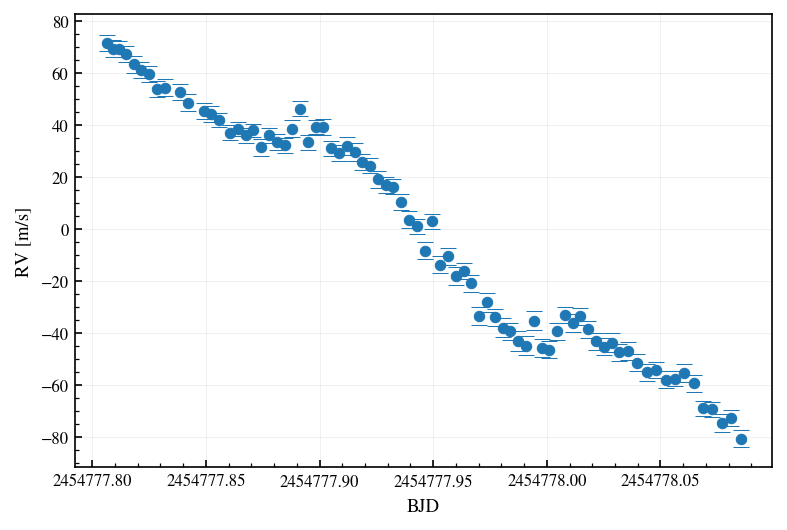

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [7]:
f = '../data/example/03_hd17156/hd17156_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/03_hd17156/hd17156_priors.dat
   prior          arg1        arg2        label  description priortype  fixed
0     NP  2.454884e+06    0.000073        t0_p1        t0_p1     model  False
1     NP  2.121640e+01    0.000016         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.000000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.000000        vsini        vsini     model  False
4     NP  8.782000e+01    0.200000       inc_p1       inc_p1     model  False
5     NP  7.270000e-02    0.000700         p_p1         p_p1     model  False
6     NP  2.600000e+01    3.000000         a_p1         a_p1     model  False
7     NP  3.900000e-01    0.050000           u1           u1     model  False
8     NP  3.700000e-01    0.050000           u2           u2     model  False
9     NP  6.801000e-01    0.001900       ecc_p1       ecc_p1     model  False
10    NP  1.216200e+02    0.420000     omega_p1     omega_p1     model

In [8]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv   center_dist
0      t0_p1  2.454884e+06  2.454884e+06  2.454884e+06  2.454884e+06  3.445894e-08
1       P_p1  2.121640e+01  2.121632e+01  2.121648e+01  2.121640e+01 -2.185964e-06
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  9.896744e+00 -9.896744e+00
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  4.321620e+00  1.067838e+01
4     inc_p1  8.782000e+01  8.682000e+01  8.882000e+01  8.782543e+01 -5.431691e-03
5       p_p1  7.270000e-02  6.920000e-02  7.620000e-02  7.262930e-02  7.069695e-05
6       a_p1  2.600000e+01  1.100000e+01  4.100000e+01  2.485759e+01  1.142415e+00
7         u1  3.900000e-01  1.400000e-01  6.400000e-01  3.930531e-01 -3.053094e-03
8         u2  3.700000e-01  1.200000e-01  6.200000e-01  3.672507e-01  2.749259e-03
9     ecc_p1  6.801000e-01  6.706000e-01  6.896000e-01  6.806289e-01 -5.289491e-04
10  omega_p1  1.216200e+0

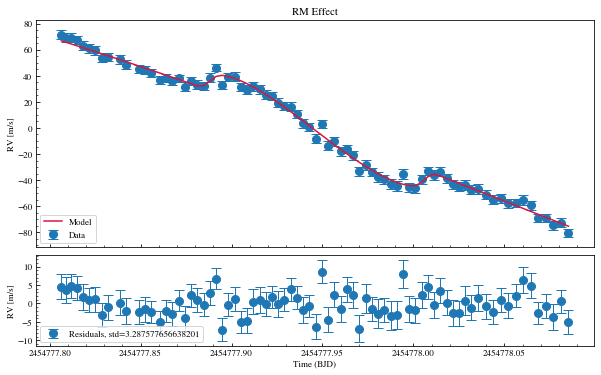

In [9]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [10]:
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/03_hd17156/hd17156_priors.dat
   prior          arg1        arg2        label  description priortype  fixed
0     NP  2.454884e+06    0.000073        t0_p1        t0_p1     model  False
1     NP  2.121640e+01    0.000016         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.000000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.000000        vsini        vsini     model  False
4     NP  8.782000e+01    0.200000       inc_p1       inc_p1     model  False
5     NP  7.270000e-02    0.000700         p_p1         p_p1     model  False
6     NP  2.600000e+01    3.000000         a_p1         a_p1     model  False
7     NP  3.900000e-01    0.050000           u1           u1     model  False
8     NP  3.700000e-01    0.050000           u2           u2     model  False
9     NP  6.801000e-01    0.001900       ecc_p1       ecc_p1     model  False
10    NP  1.216200e+02    0.420000     omega_p1     omega_p1     model

No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


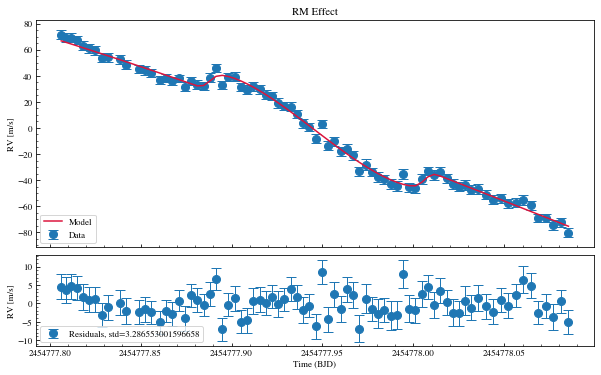

In [11]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [12]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([2.45488403e+06, 2.12164013e+01, 1.01698287e+01, 4.30584312e+00,
       8.78471200e+01, 7.26819848e-02, 2.48440845e+01, 3.89418858e-01,
       3.70495846e-01, 6.80601778e-01, 1.21563148e+02, 3.84387237e+00,
       2.76215422e+02, 9.75912446e+01, 1.17651247e+00])

## Plot chains 

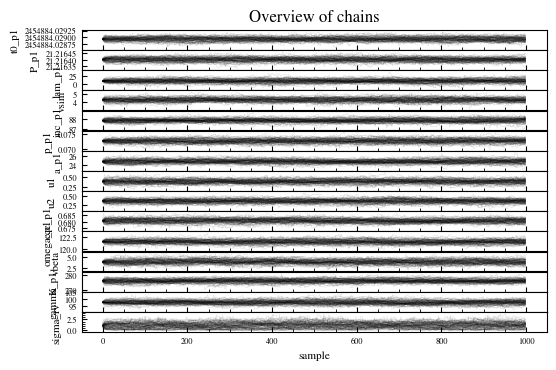

In [13]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [14]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,ecc_p1,omega_p1,vbeta,K_p1,gamma,sigma_rv
0,2.454884e+06,21.216377,-4.587767,4.614762,87.800019,0.072109,24.539607,0.428494,0.438974,0.679151,121.291731,3.944525,276.603075,96.095312,2.087357
1,2.454884e+06,21.216377,-4.587767,4.614762,87.800019,0.072109,24.539607,0.428494,0.438974,0.679151,121.291731,3.944525,276.603075,96.095312,2.087357
2,2.454884e+06,21.216377,-4.587767,4.614762,87.800019,0.072109,24.539607,0.428494,0.438974,0.679151,121.291731,3.944525,276.603075,96.095312,2.087357
3,2.454884e+06,21.216377,-4.587767,4.614762,87.800019,0.072109,24.539607,0.428494,0.438974,0.679151,121.291731,3.944525,276.603075,96.095312,2.087357
4,2.454884e+06,21.216377,-4.587767,4.614762,87.800019,0.072109,24.539607,0.428494,0.438974,0.679151,121.291731,3.944525,276.603075,96.095312,2.087357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.454884e+06,21.216377,14.549894,3.959932,88.038519,0.073091,24.319719,0.315698,0.427517,0.679399,121.227286,3.358863,277.039252,96.251049,1.926134
79996,2.454884e+06,21.216377,14.539310,3.961134,88.038638,0.073089,24.321640,0.315697,0.427361,0.679403,121.228473,3.362230,277.038204,96.255724,1.926346
79997,2.454884e+06,21.216377,14.539310,3.961134,88.038638,0.073089,24.321640,0.315697,0.427361,0.679403,121.228473,3.362230,277.038204,96.255724,1.926346
79998,2.454884e+06,21.216377,14.539310,3.961134,88.038638,0.073089,24.321640,0.315697,0.427361,0.679403,121.228473,3.362230,277.038204,96.255724,1.926346


In [15]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.13333144, 1.13097693, 1.14429634, 1.12768494, 1.14879335,
       1.12013262, 1.14926672, 1.13380116, 1.12968744, 1.15373039,
       1.15493985, 1.13488899, 1.15020682, 1.13608291, 1.13588371])

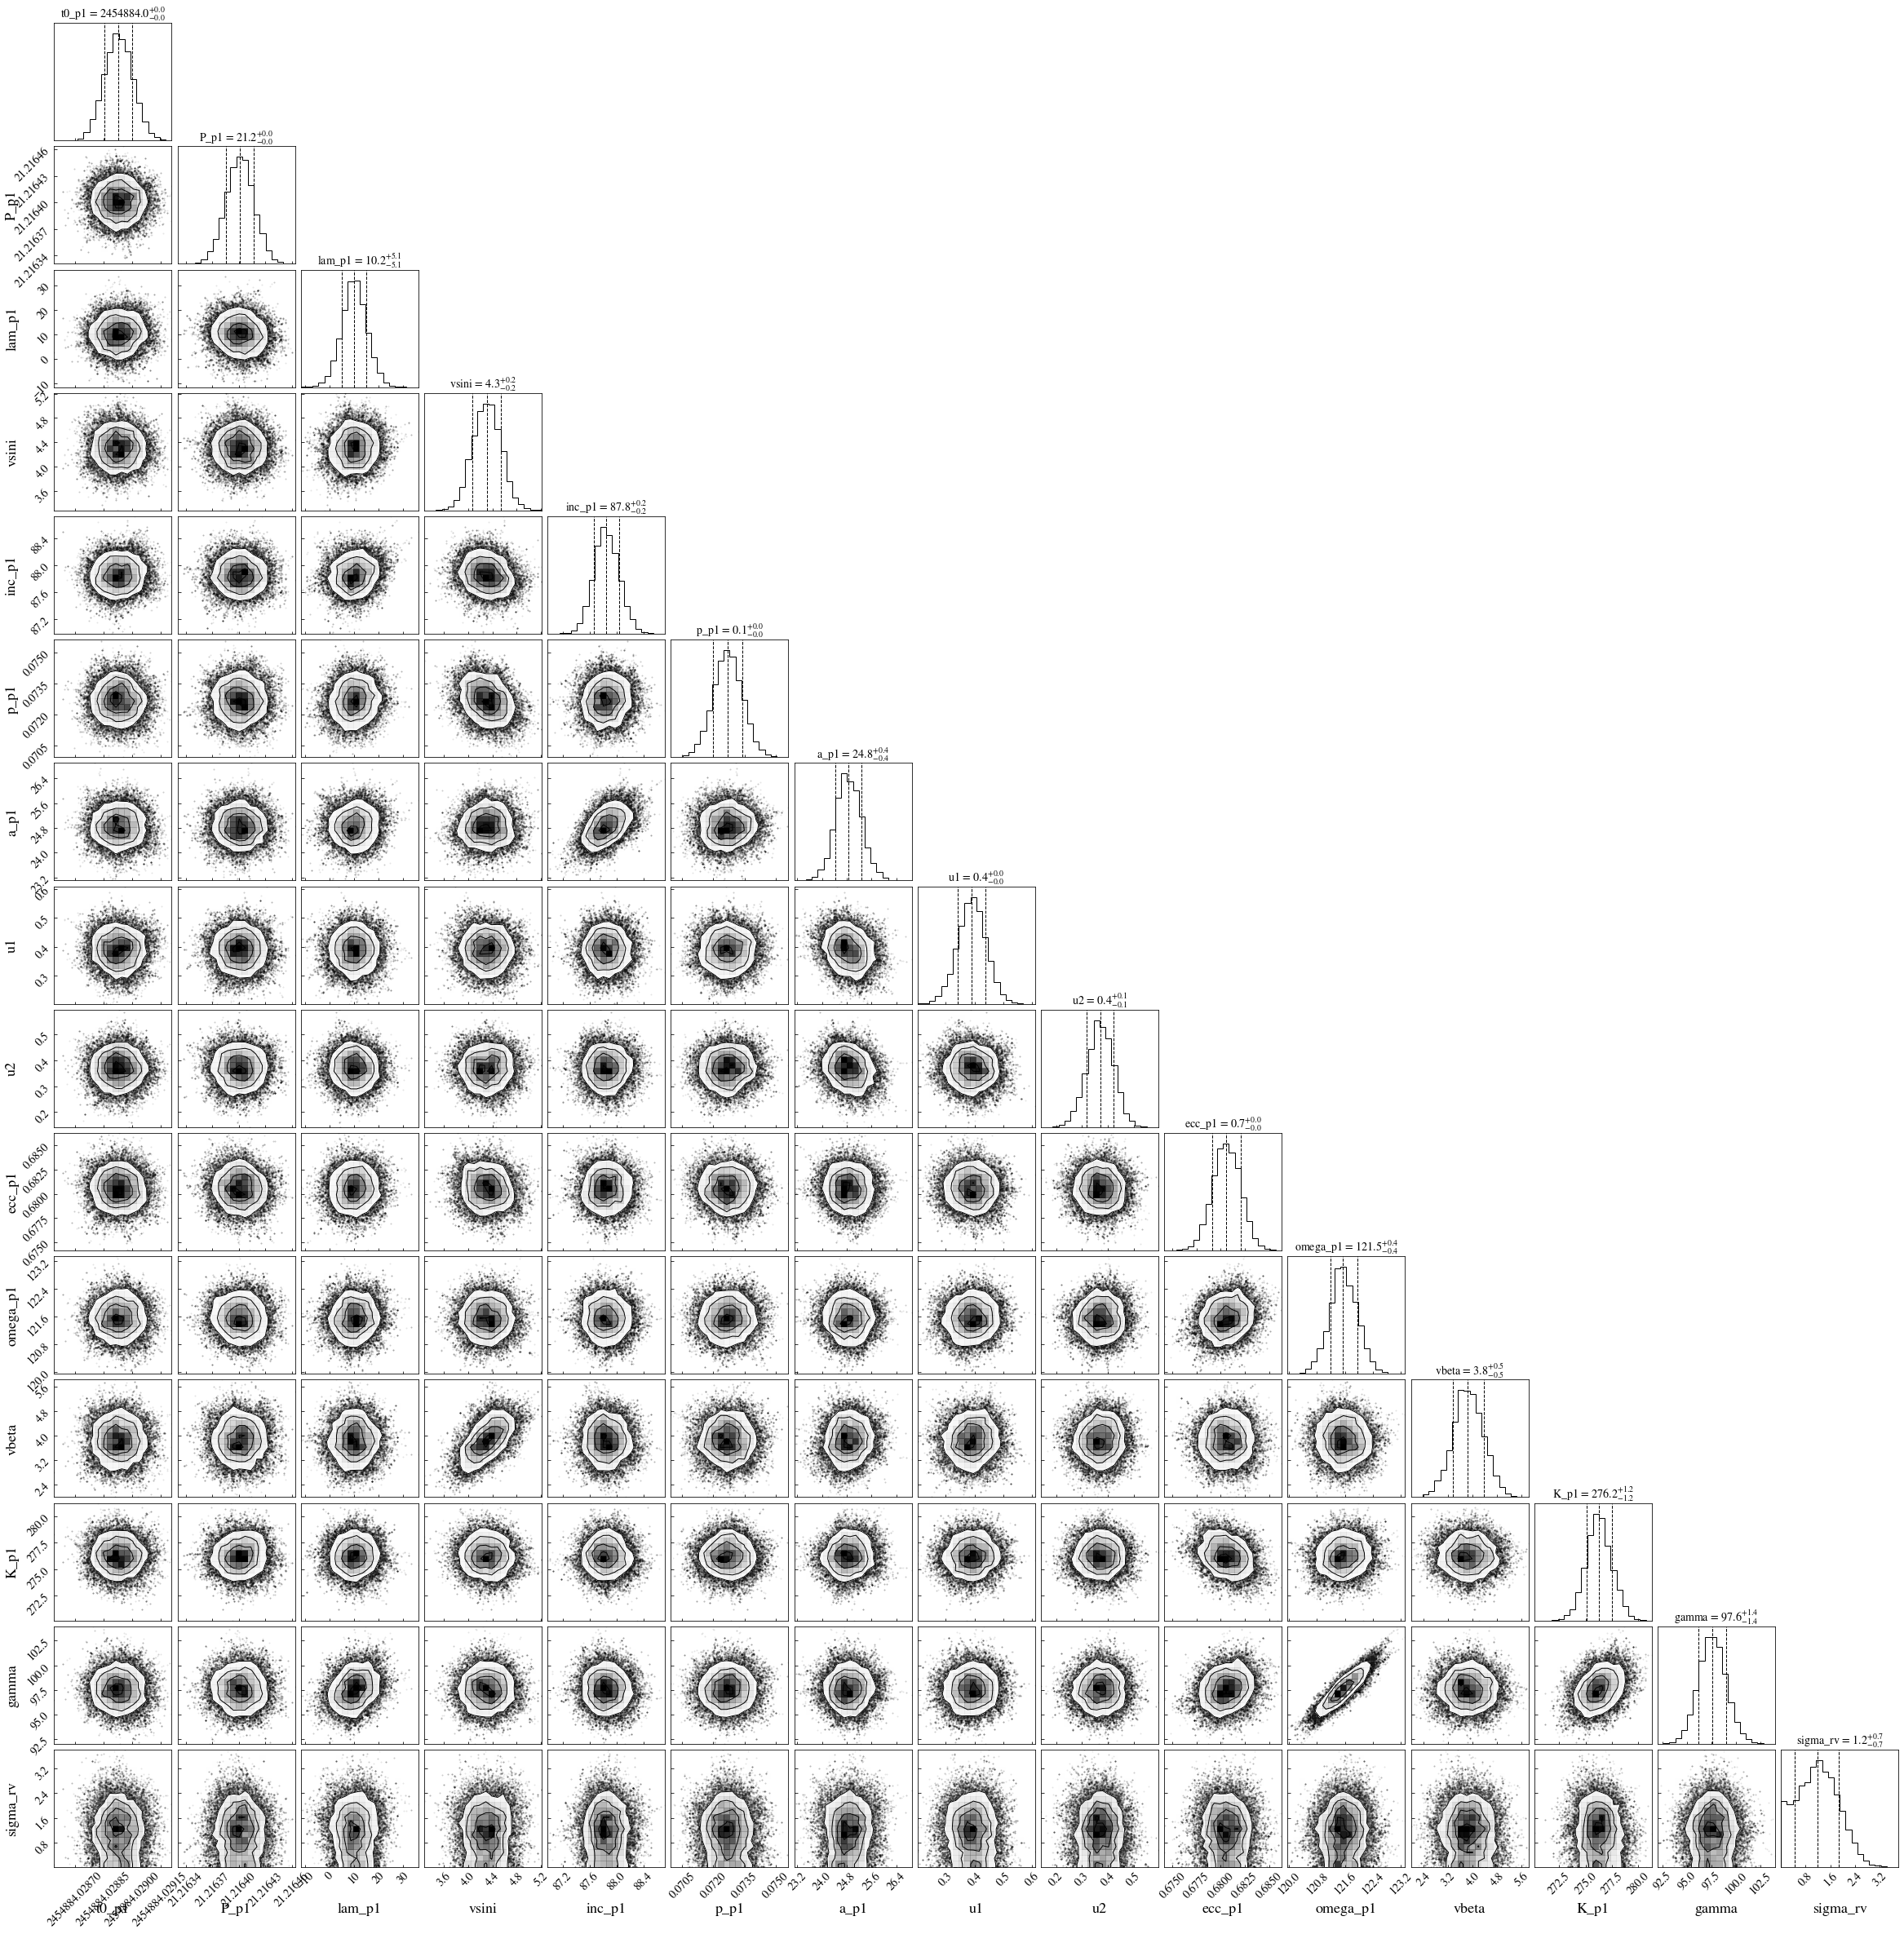

In [16]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

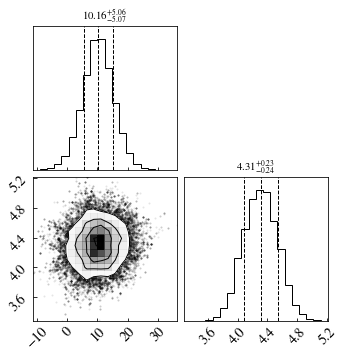

In [17]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])

In [18]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454884e+06,0.000074,0.000075,$2454884.028928_{-0.00007}^{+0.00007}$,t0_p1,t0_p1
0,2.121640e+01,0.000016,0.000015,$21.216401_{-0.00002}^{+0.00002}$,P_p1,P_p1
0,1.016236e+01,5.072510,5.062486,$10.2_{-5.1}^{+5.1}$,lam_p1,lam_p1
0,4.309776e+00,0.235140,0.229068,$4.31_{-0.24}^{+0.23}$,vsini,vsini
0,8.784584e+01,0.176896,0.193274,$87.85_{-0.18}^{+0.19}$,inc_p1,inc_p1
0,7.268700e-02,0.000692,0.000720,$0.07269_{-0.00069}^{+0.00072}$,p_p1,p_p1
0,2.483965e+01,0.397921,0.429831,$24.84_{-0.40}^{+0.43}$,a_p1,a_p1
0,3.901875e-01,0.048998,0.048300,$0.39_{-0.049}^{+0.048}$,u1,u1
0,3.703929e-01,0.051774,0.051229,$0.37_{-0.052}^{+0.051}$,u2,u2
0,6.805843e-01,0.001435,0.001445,$0.6806_{-0.0014}^{+0.0014}$,ecc_p1,ecc_p1


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


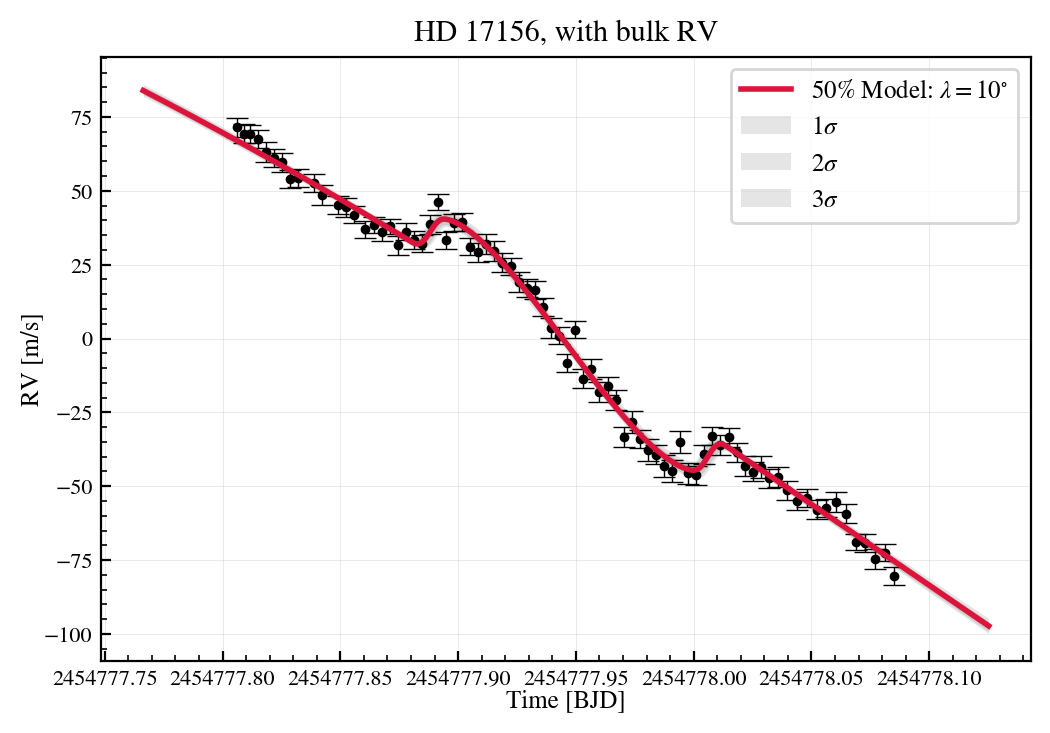

In [19]:
TITLE = 'HD 17156, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax,ticksize=8)